In [3]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [ ]:
# Build the CNN model with 6 layers
model = keras.Sequential([
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    
    layers.Dense(10, activation='softmax')
])


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


sample_images = x_test[:2]  
predictions = model.predict(sample_images)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.7019 - loss: 0.8337 - val_accuracy: 0.8535 - val_loss: 0.3975
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 108ms/step - accuracy: 0.8634 - loss: 0.3813 - val_accuracy: 0.8718 - val_loss: 0.3620
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 103s 136ms/step - accuracy: 0.8831 - loss: 0.3191 - val_accuracy: 0.8884 - val_loss: 0.3090
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 106s 141ms/step - accuracy: 0.8977 - loss: 0.2872 - val_accuracy: 0.8938 - val_loss: 0.2954
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 137s 134ms/step - accuracy: 0.9072 - loss: 0.2597 - val_accuracy: 0.8931 - val_loss: 0.2923
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8895 - loss: 0.3132
Test accuracy: 0.8903
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Image 1: Predicted: Ankle boot, True: Ankle boot
Image 2: Predicted: Pullover, True: Pullover


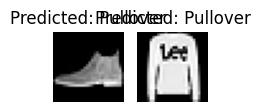

In [ ]:

for i in range(2):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[i])
    print(f'Image {i + 1}: Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}')


plt.figure(figsize=(2, 2))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {class_names[predicted_class]}')
    plt.axis('off')
plt.show()